In [1]:
# !pip3 install kafka-python==1.4.7 streamz==0.5.2 --user

In [2]:
import os
import sys

SOURCE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
sys.path.insert(0, SOURCE_DIR)

In [3]:
os.environ['ENABLE_JSON_LOGGING'] = 'true'
os.environ['LOGLEVEL'] = 'DEBUG'

In [4]:
import waterhealer as wh
from waterhealer import Stream
import json
import time
import logging

wh.__version__

'0.1.5'

In [5]:
def json_loads(rows):
    results = []
    for row in rows:
        results.append((row[0], json.loads(row[1])))
    return results

@wh.checker.check_leakage
def increment_left(rows):
    results = []
    for row in rows:
        if row[1]['data'] < 3:
            row[1]['left'] = row[1]['data'] + 1
            results.append(row)
        
    logging.info('increment_left halloooo')
    logging.info(results)
    return results

In [6]:
source = Stream(checkpoint = True)
partition = source.partition(5, checkpoint = True)
s = partition.map(json_loads, checkpoint = True)
s.map(increment_left, checkpoint = True).sink(print)

Output()

{"written_at": "2021-11-19T06:52:14.030Z", "written_ts": 1637304734030369000, "msg": "run ['dot', '-Tpng']", "type": "log", "logger": "graphviz.backend", "thread": "MainThread", "level": "DEBUG", "module": "backend", "line_no": 153, "function_name": null, "emit_id": null}


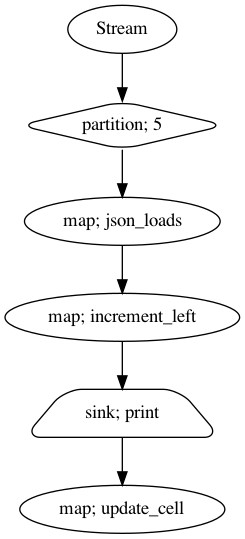

In [7]:
source.visualize()

In [8]:
for i in range(5):
    data = {'i': i, 'data': i + 1}
    id_val = {
        'partition': 0,
        'offset': i,
        'topic': 'topic',
    }
    source.emit((id_val, json.dumps(data)))
    time.sleep(0.1)

{"written_at": "2021-11-19T06:52:14.437Z", "written_ts": 1637304734437628000, "msg": "{'function_name': 'Stream', 'data': '({\\'partition\\': 0, \\'offset\\': 0, \\'topic\\': \\'topic\\'}, \\'{\"i\": 0, \"data\": 1}\\')'}", "type": "log", "logger": "root", "thread": "MainThread", "level": "INFO", "module": "core", "line_no": 509, "emit_id": "a0ea9051-a236-4474-9a9d-9e4adbfe97e3"}
{"written_at": "2021-11-19T06:52:14.539Z", "written_ts": 1637304734539103000, "msg": "{'function_name': 'Stream', 'data': '({\\'partition\\': 0, \\'offset\\': 1, \\'topic\\': \\'topic\\'}, \\'{\"i\": 1, \"data\": 2}\\')'}", "type": "log", "logger": "root", "thread": "MainThread", "level": "INFO", "module": "core", "line_no": 509, "emit_id": "6a782ba7-c09d-4bfd-bd53-3ab17c9c81f1"}
{"written_at": "2021-11-19T06:52:14.645Z", "written_ts": 1637304734645037000, "msg": "{'function_name': 'Stream', 'data': '({\\'partition\\': 0, \\'offset\\': 2, \\'topic\\': \\'topic\\'}, \\'{\"i\": 2, \"data\": 3}\\')'}", "type": "l

Exception: __main__.increment_left leaking